In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for YTD sales.

In [4]:
df1 = pd.read_csv("BTC.csv",parse_dates=['Date'])
df1.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume,APrice
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.049510
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5,0.067675
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49,0.083320
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20,0.077770
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42,0.076975


In [13]:
df=df1.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
df.tail()

,Date,APrice
3250,2019-06-09,7832.219971
3251,2019-06-10,7969.159912
3252,2019-06-11,8045.729981
3253,2019-06-12,8204.855225
3254,2019-06-13,8464.495118


## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [14]:
df.sort_values(by=['Date'])
df.head(20)


,Date,APrice
0,2010-07-16,0.049510
1,2010-07-17,0.067675
2,2010-07-18,0.083320
3,2010-07-19,0.077770
4,2010-07-20,0.076975
5,2010-07-21,0.064855
6,2010-07-22,0.056560
7,2010-07-23,0.058580
8,2010-07-24,0.052520
9,2010-07-25,0.053250


In [15]:
df.isnull().sum()

Date       0
APrice     0
dtype: int64

In [16]:
df2 = df.groupby('Date')['APrice '].sum().reset_index()
df2

,Date,APrice
0,2010-07-16,0.049510
1,2010-07-17,0.067675
2,2010-07-18,0.083320
3,2010-07-19,0.077770
4,2010-07-20,0.076975
5,2010-07-21,0.064855
6,2010-07-22,0.056560
7,2010-07-23,0.058580
8,2010-07-24,0.052520
9,2010-07-25,0.053250


## Indexing with time series data

In [19]:
df3 = df2.set_index(['Date'])
df3.head()

,APrice
Date,
2010-07-16,0.049510
2010-07-17,0.067675
2010-07-18,0.083320
2010-07-19,0.077770
2010-07-20,0.076975


In [20]:
y = df3.resample('D').mean()


In [21]:
pd.isna(y)

,APrice
Date,
2010-07-16,False
2010-07-17,False
2010-07-18,False
2010-07-19,False
2010-07-20,False
2010-07-21,False
2010-07-22,False
2010-07-23,False
2010-07-24,False


In [22]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__)
init_notebook_mode(connected=True)
cf.go_offline()

3.10.0


## Visualizing  sales time series 


In [23]:
y.iplot()


In [26]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(y['APrice '].dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -1.385058
p-value                           0.589418
#Lags Used                       29.000000
Number of Observations Used    3216.000000
Critical Value (1%)              -3.432385
Critical Value (5%)              -2.862439
Critical Value (10%)             -2.567249
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.075656e+01
p-value                        2.584232e-19
#Lags Used                     2.800000e+01
Number of Observations Used    3.207000e+03
Critical Value (1%)           -3.432391e+00
Critical Value (5%)           -2.862442e+00
Critical Value (10%)          -2.567250e+00
dtype: float64


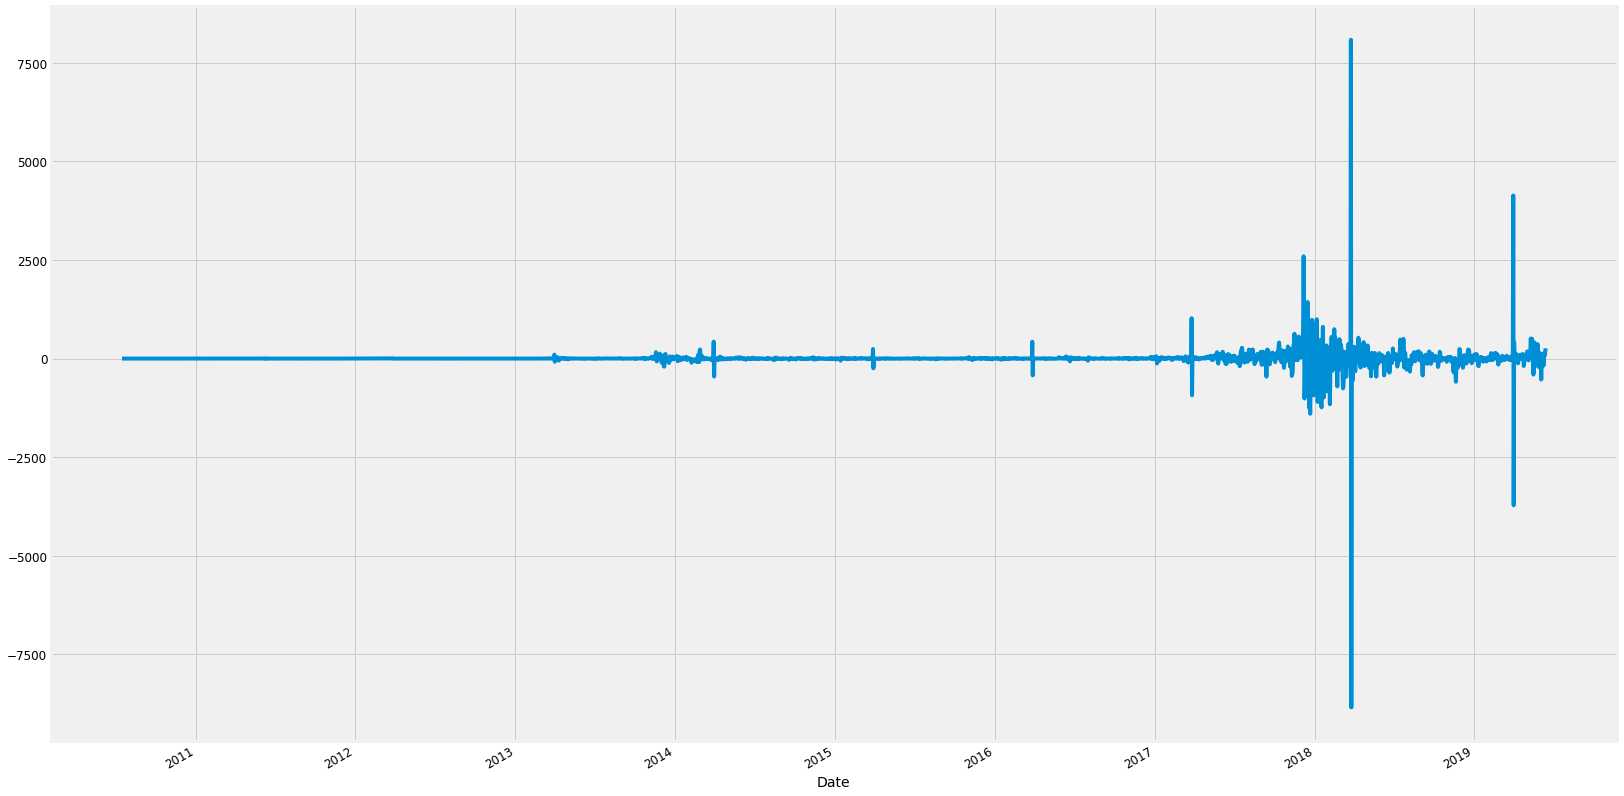

In [31]:
y['YTD_diff'] = y['APrice '] - y['APrice '].shift(1)
y['YTD_diff'].dropna().plot(figsize=(25, 15))
adf_test(y['YTD_diff'].dropna())


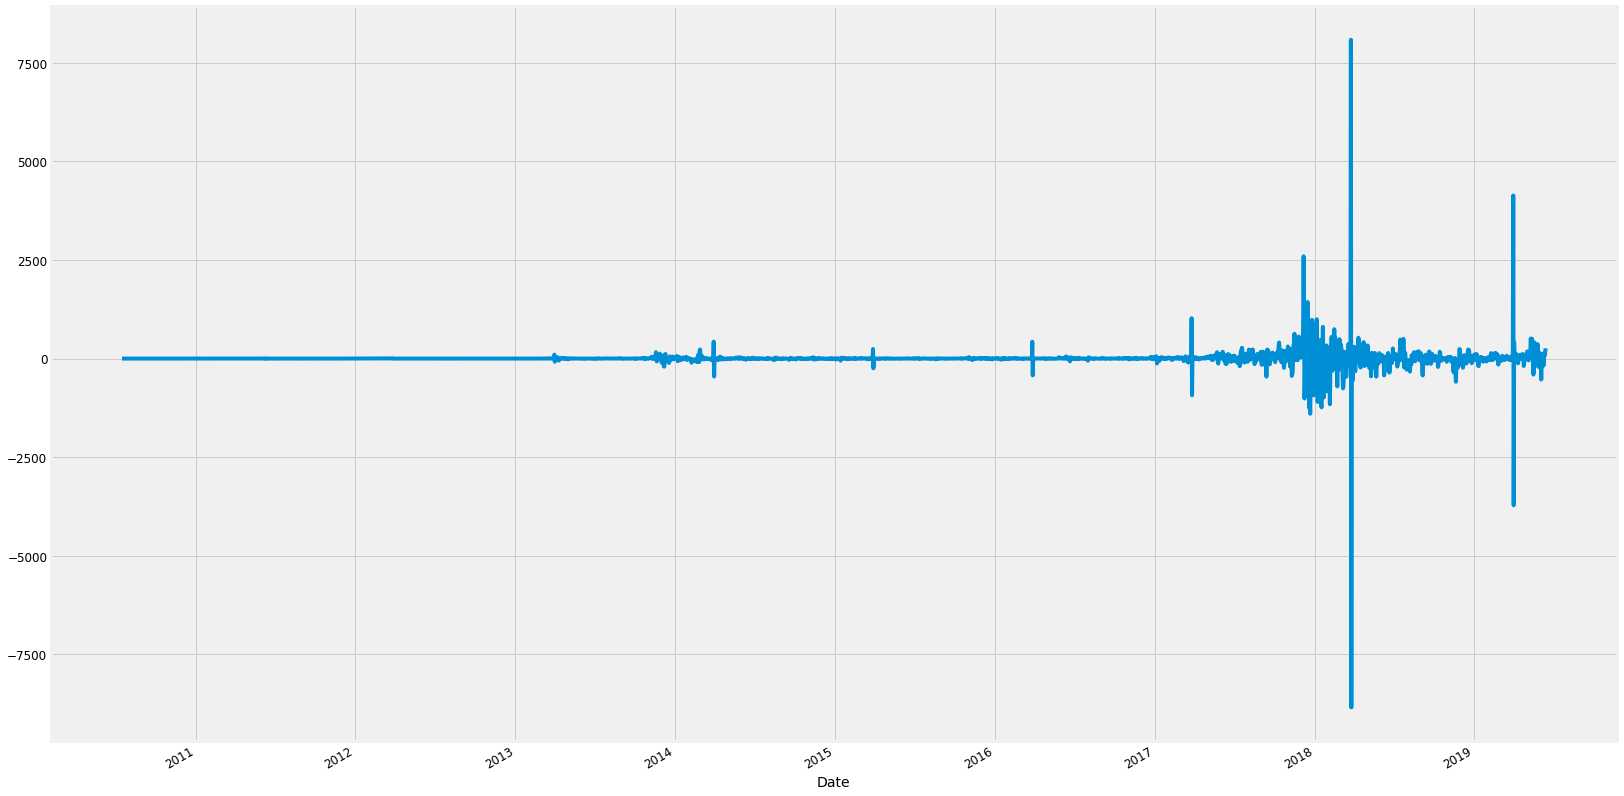

In [32]:
y['YTD_ACTL_log'] = np.log(y['APrice '])
y['YTD_ACTL_log_diff'] = y['APrice '] - y['APrice '].shift(1)
y['YTD_ACTL_log_diff'].dropna().plot(figsize=(25, 15))

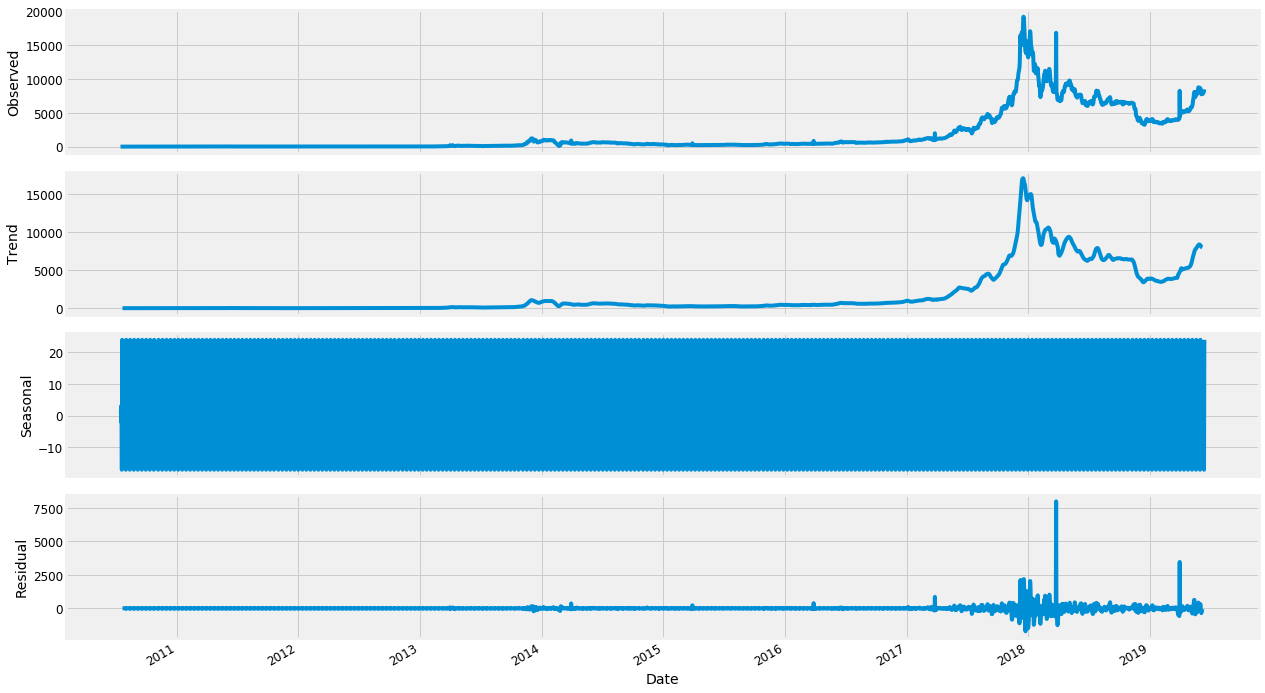

In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

decomposition = sm.tsa.seasonal_decompose(y['APrice '].dropna(), model='additive',freq=12)
fig = decomposition.plot()
fig.set_size_inches(18,10)

plt.show()

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [34]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['APrice '],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:62161.4081685314
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:58448.741826091
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:51855.14840199771
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:51676.58182342649
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:51860.63218442208
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:51847.631774173766
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:51691.50596057533
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:51678.60860311384
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:59840.373092960974
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:54937.62552024986
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:49725.12045854003
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:49471.80420251899
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:49731.69921394191


C:\Users\Cityzen\Ananconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:49757.45099326423
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:49502.655997435824
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:49473.40579869514
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:45552.35209184885
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:45396.749717277016
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:47700.090918639646
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:45292.918261841565
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:45409.72581291742
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:45398.327651868734
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:46642.08479350493
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:45293.59472695537
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:45337.009314821
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:45181.23328538462
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:47498.5695126309
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:45079.01818635289
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:45207.3415041767
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:45180.1078699369
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:46461.44665552097
ARIMA(0, 1

In [36]:
mod = sm.tsa.statespace.SARIMAX(y['APrice '],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0980      0.015     -6.353      0.000      -0.128      -0.068
ma.L1         -0.1573      0.016     -9.914      0.000      -0.188      -0.126
ar.S.L12      -0.0249      0.011     -2.303      0.021      -0.046      -0.004
ma.S.L12      -1.0000      0.002   -501.691      0.000      -1.004      -0.996
sigma2      6.913e+04   2.87e-08   2.41e+12      0.000    6.91e+04    6.91e+04


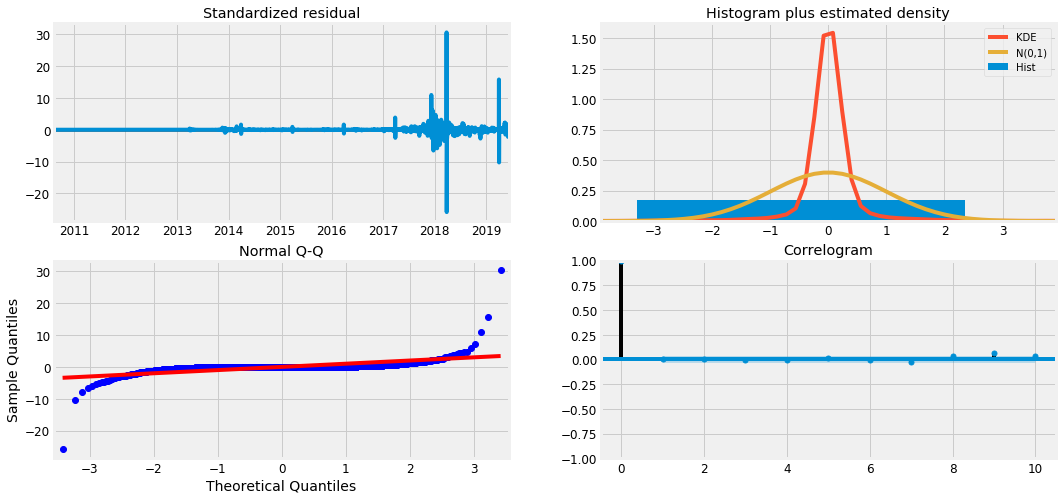

In [37]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 201-04-01 to the end of the data.

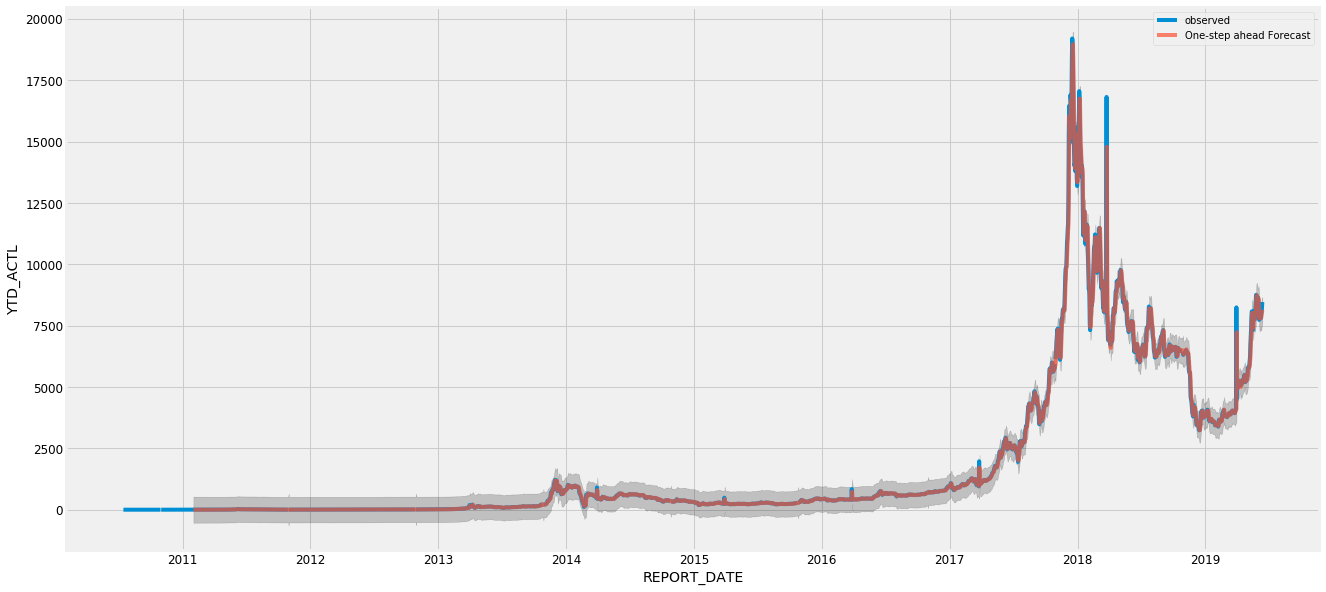

In [38]:
pred = results.get_prediction(start=200,dynamic=False)
pred_ci = pred.conf_int()

ax = y['APrice '].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 10))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('REPORT_DATE')
ax.set_ylabel('YTD_ACTL')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y['APrice ']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 73344.88


In [40]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 270.82


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

## Producing and visualizing forecasts

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_uc = results.get_forecast(steps=400)
pred_ci = pred_uc.conf_int()

ax = y['APrice '].iplot()
pred_uc.predicted_mean.iplot()



Our model clearly captured YTD sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.